## Introduction to the Walmart Business Case:

Walmart, a multinational retail giant, aims to analyze customer purchase behavior during Black Friday, specifically focusing on the purchase amount based on gender, marital status, and age groups. They want to understand if women spend more than men, and how other factors influence spending. The provided dataset contains transactional data of customers who made purchases during Black Friday.

My analysis will focus on exploring spending patterns for different customer segments and calculating confidence intervals for average spending. The insights gained will help Walmart make informed decisions and improve their strategies for Black Friday and beyond. We will provide actionable recommendations to optimize business performance.

Let's proceed with the data analysis and draw valuable insights to support Walmart's goals.

## About the data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

## About the problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [2]:
# Importing necessary libraries
import urllib.request as urll
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
urll.urlretrieve("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094","walmart.csv")

('walmart.csv', <http.client.HTTPMessage at 0x79a73e95c430>)

In [4]:
walmart_df= pd.read_csv("walmart.csv")

In [5]:
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [6]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


The DataFrame contains 550,068 entries (rows) with a RangeIndex from 0 to 550,067.

The DataFrame has 10 columns with different data types (int64 and object).

The data columns are named: 'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', and 'Purchase'.

The 'Non-Null Count' column indicates that all columns have 550,068 non-null values, meaning there are no missing values in any of the columns.

The 'Dtype' column indicates the data type of each column. int64 represents integer data, and object represents string or categorical data.
Here's a brief description of each column:

User_ID: An integer column representing the unique identifier for each user.

Product_ID: A string column representing the unique identifier for each product.

Gender: A string column representing the gender of the users (e.g., 'Male' or 'Female').

Age: A string column representing the age group of the users (e.g., '18-25', '26-35', etc.).

Occupation: An integer column representing the occupation code of the users.

City_Category: A string column representing the category of the city where the users live (e.g., 'A', 'B', 'C').

Stay_In_Current_City_Years: A string column representing the number of years the users have stayed in the current city (e.g., '1', '2', '3+').

Marital_Status: An integer column representing the marital status of the users (0 for unmarried, 1 for married).

Product_Category: An integer column representing the category code of the purchased product.

Purchase: An integer column representing the purchase amount.


In [46]:
# Checking for duplcated rows
if walmart_df.duplicated().sum()==0:
  print("No duplicated rows")
else:
  print(f"{walmart_df.duplicated().sum()}-duplicate row")

No duplicated rows


In [8]:
#Replacing 0 with single and 1 with married in Marital_Status
walmart_df['Marital_Status'] = walmart_df['Marital_Status'].replace({0: 'Single', 1: 'Married'})

In [9]:
selected_columns = walmart_df[['Purchase']]

# Generating descriptive statistics for the selected columns
selected_columns_stats = selected_columns.describe()

print(selected_columns_stats)


            Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000


count: The number of non-null values in the 'Purchase' column is 550,068, which indicates that there are no missing values in this column.

mean: The mean (average) purchase amount in the 'Purchase' column is approximately 9263.97. This represents the typical spending amount across all transactions.

std: The standard deviation of the 'Purchase' column is approximately 5023.07. It measures the dispersion or variability of the data points around the mean. A higher standard deviation indicates more spread-out data.

min: The minimum purchase amount in the 'Purchase' column is 12. This is the smallest recorded spending in any transaction.

25%: The 25th percentile, also known as the first quartile, is 5823. This means that 25% of the transactions have a purchase amount below 5823.

50%: The 50th percentile, which is the median, is 8047. This represents the middle value of the sorted 'Purchase' data, where half of the transactions have a purchase amount below 8047.

75%: The 75th percentile, also known as the third quartile, is 12054. This means that 75% of the transactions have a purchase amount below 12054.

max: The maximum purchase amount in the 'Purchase' column is 23961. This is the highest recorded spending in any transaction.

## Checking for outliers and getting basic information.

In [10]:
walmart_df["User_ID"].nunique()

5891

There total 5891 unique customers in this data.

In [11]:
walmart_df["Product_ID"].nunique()

3631

There are total 3631 unique products in this dataset.

In [12]:
walmart_df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Number of times Female Bought from walmart  is 135809.

Number of times male bought from walmart is 414259.



In [13]:
walmart_df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
walmart_df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
walmart_df["Marital_Status"].value_counts()

Single     324731
Married    225337
Name: Marital_Status, dtype: int64

Married customers bought 225337 times from  walmart.

single customers bought 324731 times from walmart

In [16]:
walmart_df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [17]:
product_category= walmart_df["Product_Category"].value_counts()
number_of_category= walmart_df["Product_Category"].nunique()
print(product_category,"\n",number_of_category)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64 
 20


The product category are codes and there are 20 different product categories in the dataset.


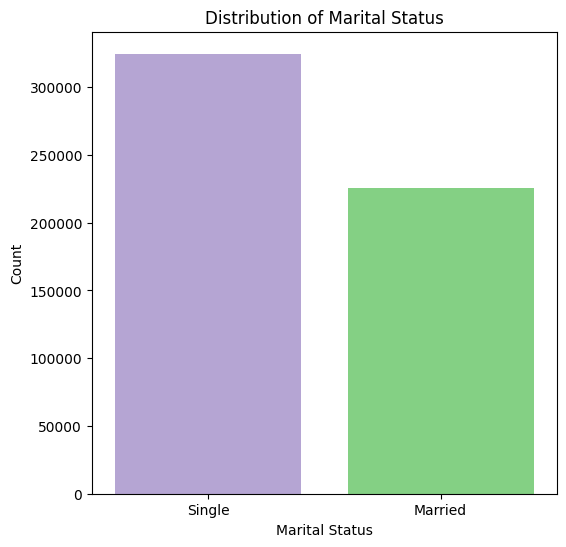

In [18]:
# Create a countplot for Marital_Status
plt.figure(figsize=(6, 6))
sns.countplot(x=walmart_df["Marital_Status"], palette=["#B39DDB", "#77DD77"])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Comparison of Single and Married Customers Insights:

Higher Single Count: The count of single customers is higher than that of married customers. This suggests that a larger portion of Walmart's customer base consists of single individuals.

Marketing Strategies: Walmart could tailor marketing campaigns and offers to appeal to the single demographic, considering their higher representation. Special promotions, events, or products that cater to the preferences and needs of single customers could be introduced.

Product Diversity: Understanding the preferences of single customers could help Walmart diversify its product range. For instance, offering smaller package sizes, ready-to-eat meals, or products suited for individual use might resonate well with this group.

Married Customers Engagement: While the count of married customers is lower, it's important to note that they might have different shopping behaviors. Analyzing their purchase patterns, such as larger family-oriented purchases or seasonal trends, can provide insights for targeted marketing strategies.

Family-Focused Campaigns: Walmart could develop family-oriented campaigns that resonate with married customers. This could include promotions on family-sized products, back-to-school offers, or holiday-themed bundles.

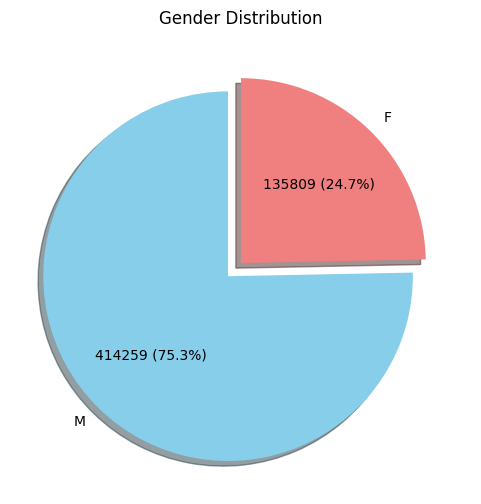

In [19]:
# Count the occurrences of each gender
gender_counts = walmart_df['Gender'].value_counts()

# Explode the pie chart
explode = (0.1, 0)  # Explode the first slice (Female)

# Create an exploded pie chart with value and percent labels and shadow
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(gender_counts) / 100, p), startangle=90, explode=explode, shadow=True, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


Gender-Based Shopping Behavior:

The data indicates that a significant majority of shopping is done by males, with females accounting for only one-fourth of the total shopping. This suggests that there might be gender-specific preferences, needs, or trends in shopping behavior. To capitalize on this insight, Walmart could consider tailoring its marketing and product offerings to cater to the preferences of both genders. Understanding the factors that influence shopping decisions for each gender can help optimize product placement, promotions, and inventory management to effectively cater to both customer segments.

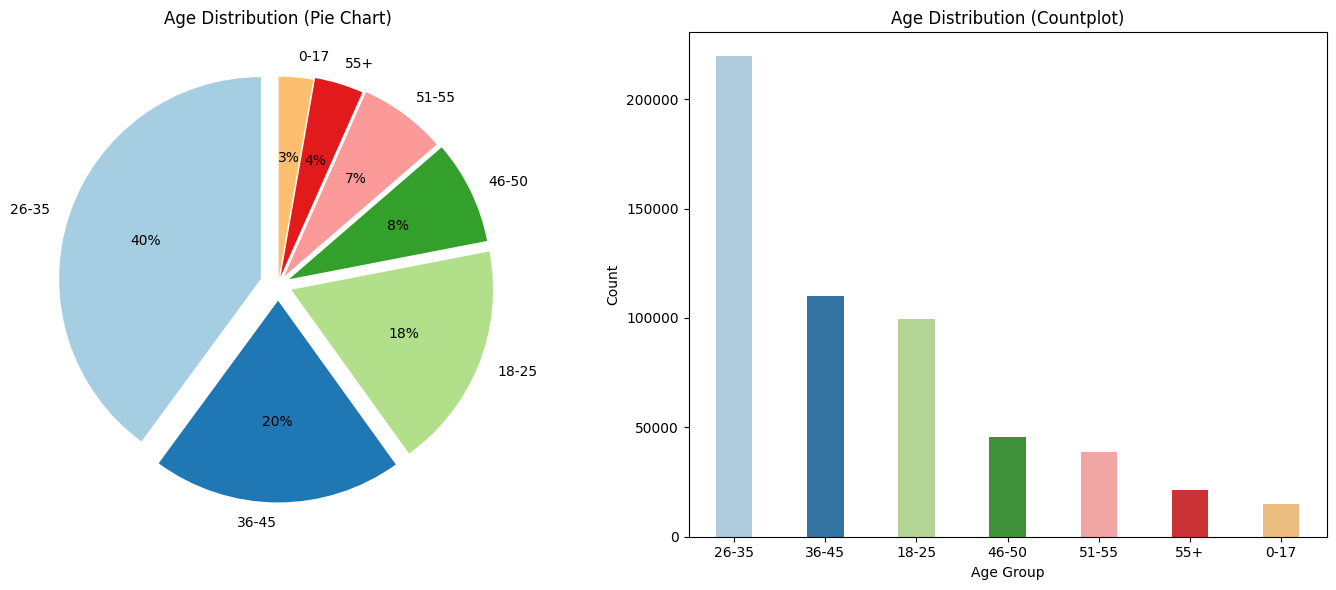

In [20]:
age_counts = walmart_df["Age"].value_counts()

# Labels for the age groups
age_labels = age_counts.index

# Calculate the count of each age group
age_counts = walmart_df["Age"].value_counts()

# Sort age groups based on counts in descending order
sorted_age_order = age_counts.index

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart with custom explode values
explode = [0.09 - i * 0.01 for i in range(len(age_counts))]
axes[0].pie(age_counts, labels=age_labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors, explode=explode)
axes[0].set_title('Age Distribution (Pie Chart)')

# Countplot with age groups arranged by count in descending order
sns.countplot(x=walmart_df["Age"], order=sorted_age_order, palette=plt.cm.Paired.colors, ax=axes[1],width=0.4)
axes[1].set_title('Age Distribution (Countplot)')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Age Distribution Insights:

Peak Age Group (26-35): The highest count of customers falls within the age group of 26 to 35. This suggests that Walmart's primary customer base is in the mid-adult age range. They are likely to be in their working years and might have diverse shopping preferences and needs.

Middle-Aged Shoppers (36-45): The next significant age group is 36 to 45. This indicates that Walmart also attracts a substantial number of middle-aged customers. Targeted marketing strategies catering to this demographic could include family-oriented products and household essentials.

Young Adults (18-25): The 18 to 25 age group follows, representing a sizable portion of the customer base. Walmart might focus on offering products appealing to younger adults, such as technology, fashion, and affordable options suitable for students.

Middle-Aged and Beyond (46+): Customers aged 46 and above are distributed across several age groups. This suggests a diverse range of older customers, each with distinct preferences and needs. Walmart could tailor offerings to suit different age subgroups within this range.

Varied Age Preferences: The distribution of customers across different age groups highlights the need for a wide variety of products and services to cater to diverse age-based demands.

Marketing Strategies: Walmart can develop targeted marketing campaigns for different age segments, focusing on products and promotions that resonate with each group's preferences and lifestyle.

Product Assortment: The age distribution provides insights into the types of products that might be popular. Walmart could optimize its product assortment and stock levels based on the shopping behavior of different age groups.

Store Layout and Experience: Understanding the age distribution can help Walmart optimize store layouts and provide an enhanced shopping experience. For example, placing relevant products near high-traffic areas for each age group can increase customer satisfaction.

Customer Engagement: Walmart might consider loyalty programs, discounts, and offers tailored to specific age groups, incentivizing different segments to shop more frequently.

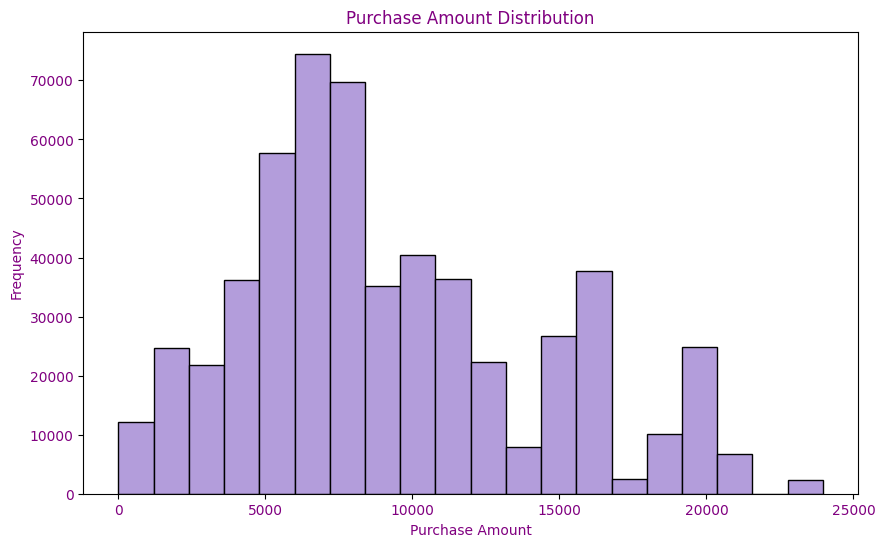

In [21]:
# Histogram for the Purchase column
plt.figure(figsize=(10, 6))
plt.hist(walmart_df["Purchase"], bins=20, color="#B39DDB", edgecolor="black")
plt.title('Purchase Amount Distribution',color="purple")
plt.xlabel('Purchase Amount',color="purple")
plt.ylabel('Frequency',color="purple")
plt.xticks(color="purple")
plt.yticks(color="purple")
plt.show()


Purchase Amount Distribution Insights:

Most Common Purchase Range: The majority of purchases fall within the range of 5000  to 15000. This indicates that a significant number of customers make purchases within this price range, suggesting that it might be a popular price point for products.

Lower-Priced Purchases: There is a notable frequency of purchases in the range of 0 to 5000. This might indicate the presence of lower-priced items or discounts that attract a considerable number of customers.

Higher-Priced Purchases: The histogram shows a moderate frequency of purchases in the range of 15000 to 20000. This suggests that a substantial number of customers are willing to make purchases in this higher price range, which might indicate premium or luxury products.

Sparsity in Extremely High Purchases: There is relatively low frequency in the bin corresponding to purchases beyond 15000. This could imply that purchases with very high amounts are rare or less common among the customer base.

Tail Distribution: The histogram displays a right-skewed distribution, where most purchases are concentrated in the lower and middle price ranges, while fewer purchases occur in the higher price ranges.

Potential Targeting: Based on the distribution, Walmart could consider targeted marketing strategies for different price ranges. For instance, promotions or offers could be designed to attract more customers to purchase within the 5000 to 15000 range, or exclusive products could be introduced in the 15000 to 20000 range to cater to customers looking for premium items.

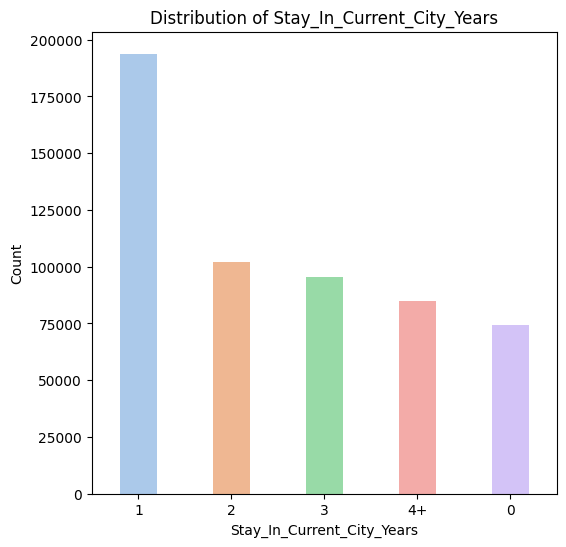

In [22]:
# Countplot for Stay_In_Current_City_Years
plt.figure(figsize=(6, 6))
stayincity= walmart_df["Stay_In_Current_City_Years"].value_counts()
order=stayincity.index
sns.countplot(x=walmart_df["Stay_In_Current_City_Years"], palette="pastel",order=order,width=0.4)
plt.title('Distribution of Stay_In_Current_City_Years')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.show()


Distribution of Stay in Current City Years Insights:

Transient Residents (1 Year): The highest count of customers indicates that a significant number of shoppers have been staying in their current city for only one year. This might suggest a trend of frequent relocation or a transient population. Walmart could consider catering to the needs of newcomers who may require essentials and household items upon moving.

Steady Residents (2 and 3 Years): The next two highest counts correspond to customers who have been living in their current city for two and three years, respectively. This could imply a more stable demographic that Walmart can engage through loyalty programs and offers tailored to their longer stay.

Long-Term Residents (4+ Years): Customers who have been staying in their current city for four or more years represent a considerable portion of the population. This group might consist of settled residents who form a loyal customer base. Walmart could develop strategies to retain and engage this demographic further.

Recent Arrivals (0 Years): The lowest count is for customers who have recently arrived in their current city. Walmart could target this group with promotions and services that assist newcomers in setting up their households and adapting to the new location.

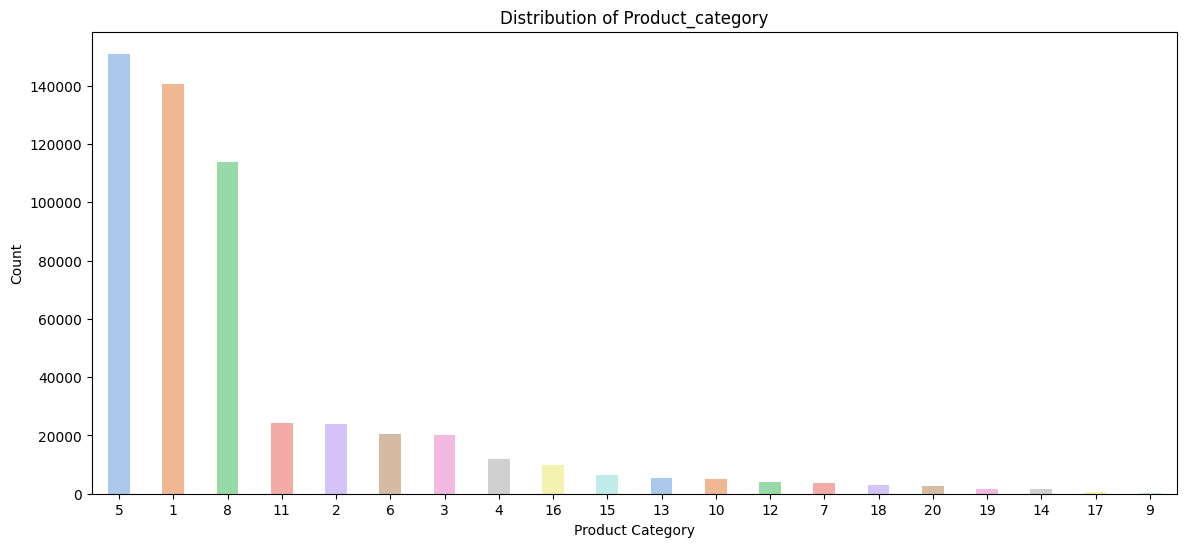

In [23]:
# Countplot for Product_Category
plt.figure(figsize=(14, 6))
Category= walmart_df["Product_Category"].value_counts()
order=Category.index
sns.countplot(x=walmart_df["Product_Category"], palette="pastel",order=order,width=0.4)
plt.title("Distribution of Product_category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()


5,1,8 are top 3 product category for walmart.Not much can inferred from this this as category as code.

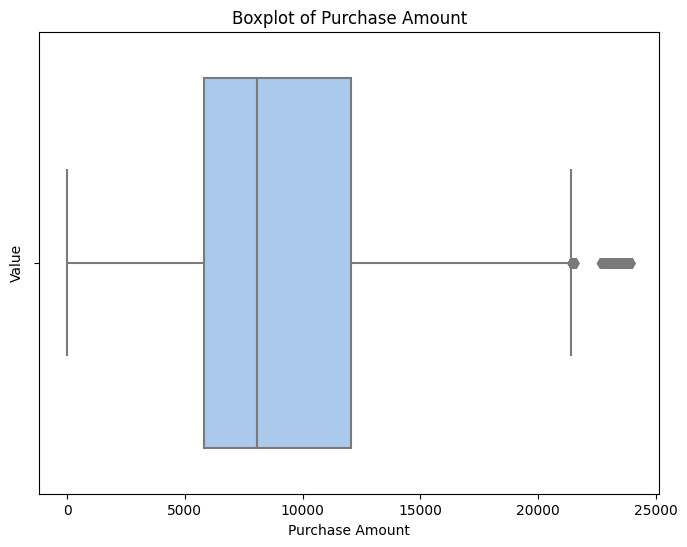

In [24]:
# boxplot for the Purchase column
plt.figure(figsize=(8, 6))
sns.boxplot(x=walmart_df["Purchase"], palette="pastel")
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Value')
plt.show()


By looking at the boxplot , it is clear that purchase after the amount 21000 is considered as outliers.

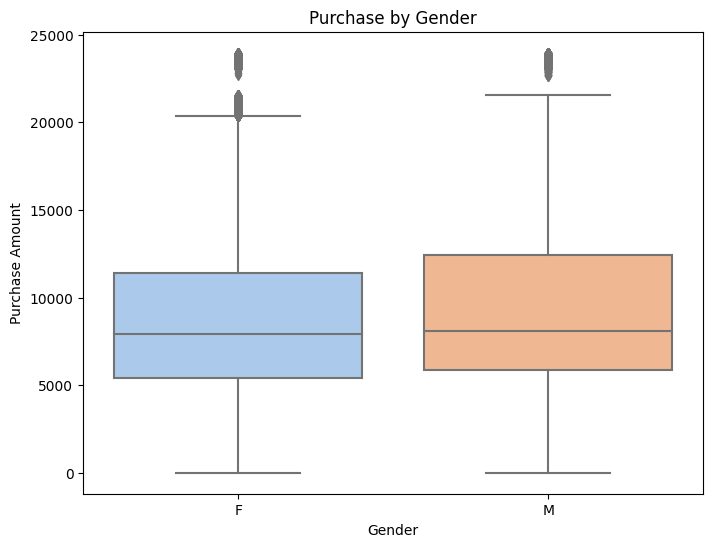

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=walmart_df["Gender"], y=walmart_df["Purchase"], palette="pastel")
plt.title('Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


Median Purchase Amount: The median purchase amount for both male and female customers is similar, with a slightly higher median for males. This suggests that, on average, both genders spend a comparable amount during their purchases, but males tend to have slightly higher median spending.

Interquartile Range (IQR): The box for male customers is slightly bigger than that for female customers, indicating a wider interquartile range. This suggests that there is more variability in the spending habits of male customers compared to female customers.

Outliers: The box plot for male customers has fewer outliers (data points that fall significantly outside the main distribution) compared to female customers. This implies that while both genders have similar median spending, female customers exhibit more extreme purchasing behavior, both in terms of high and low spending.

Distribution Shape: The box plot shows that the distribution of purchase amounts for both genders is right-skewed, with a longer tail of higher spending. This suggests that there are some customers, regardless of gender, who make high-value purchases.

Gender Differences: The differences in median and distribution suggest that there might be underlying factors contributing to variations in spending habits between genders. These factors could include product preferences, shopping patterns, or marketing strategies targeted towards different gender groups.

Marketing Insights: While the median spending is similar, the wider spread of spending for males and the presence of more outliers among females could offer valuable insights for marketing and sales strategies. Walmart may want to tailor promotions, product offerings, or shopping experiences to better target and engage both male and female customers.







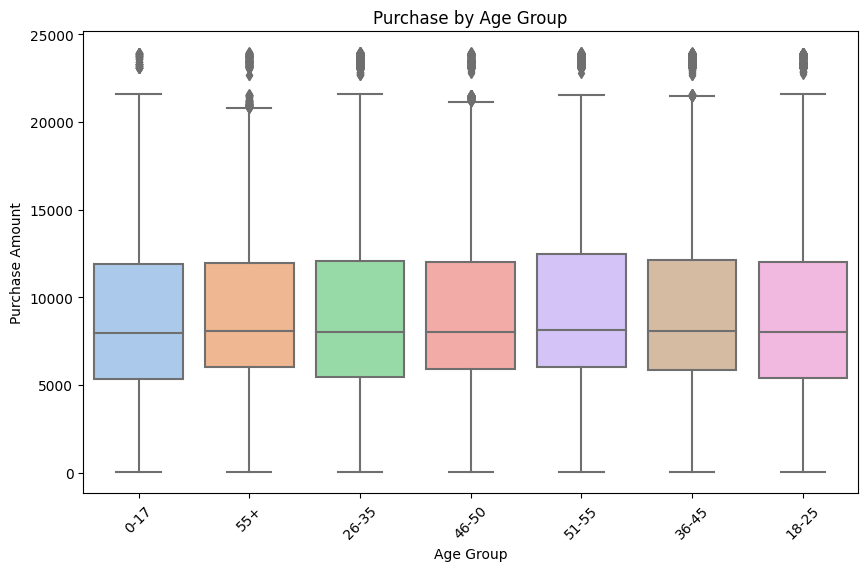

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=walmart_df["Age"], y=walmart_df["Purchase"], palette="pastel")
plt.title('Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()


Almost similar average purchase for every age group with outliers. This show that amount of purchase has no relation with customer age.

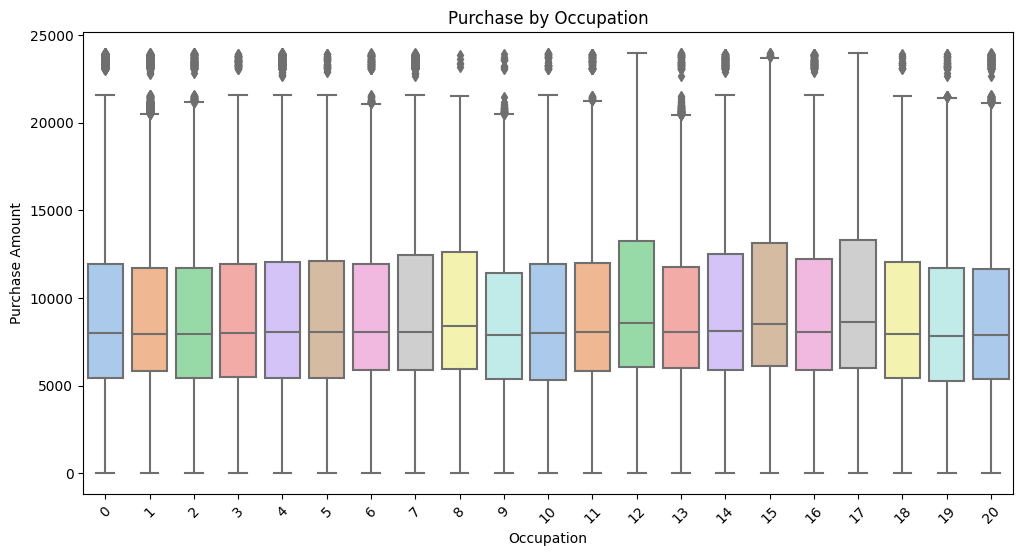

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=walmart_df["Occupation"], y=walmart_df["Purchase"], palette="pastel")
plt.title('Purchase by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()


All occupation type has almost similar average purchase.

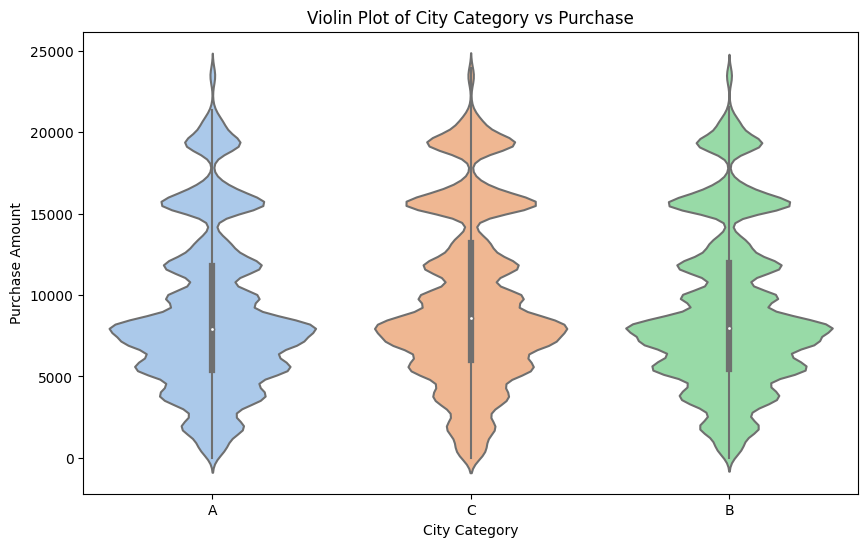

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=walmart_df["City_Category"], y=walmart_df["Purchase"], palette="pastel")
plt.title('Violin Plot of City Category vs Purchase')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()


Similar Purchase Patterns: The similar shapes of the violin plots indicate that the distribution of purchase amounts is relatively consistent across different city categories (A, B, and C). This suggests that customers from all three city categories exhibit comparable purchasing behavior.

Consistent Spending Habits: The similar medians for purchase amounts across city categories indicate that, on average, customers from different city categories spend a similar amount. This could imply that factors such as shopping preferences, product availability, or promotional activities are influencing purchasing behavior uniformly across the cities.

Uniform Market Strategies: The consistent distribution shapes and medians may suggest that Walmart's marketing and sales strategies are effectively reaching and appealing to customers in all city categories. It could indicate that promotions, discounts, and product offerings are resonating with a wide range of customers regardless of their city category.

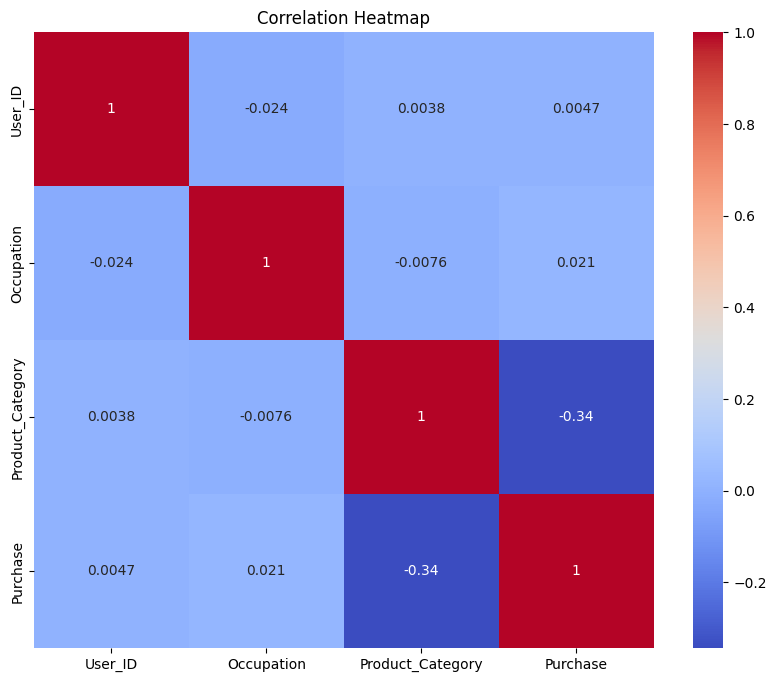

In [29]:
plt.figure(figsize=(10, 8))
corr_matrix = walmart_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1400x800 with 0 Axes>

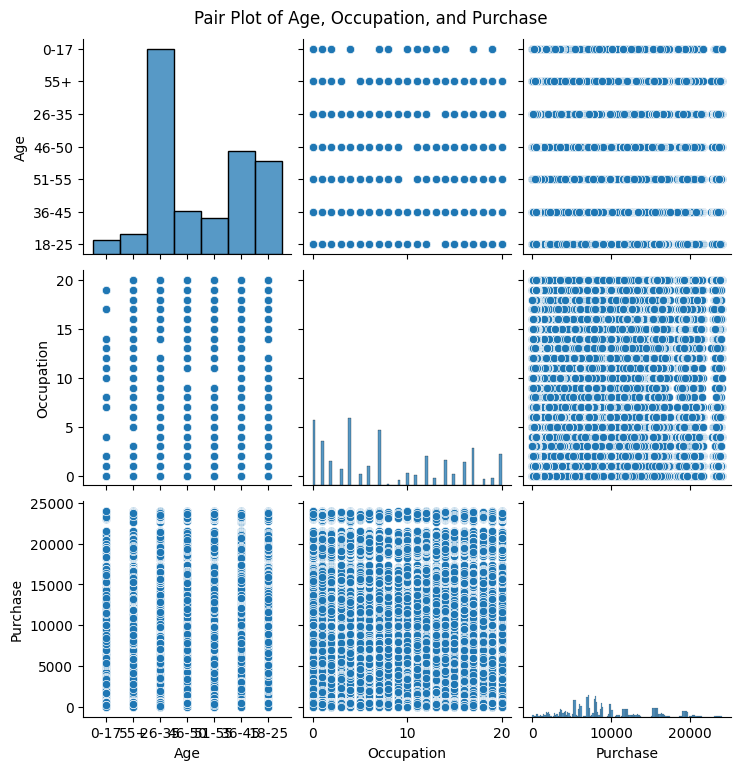

In [30]:
plt.figure(figsize=(14,8))
sns.pairplot(walmart_df, vars=["Age", "Occupation", "Purchase"], palette='pastel')
plt.suptitle('Pair Plot of Age, Occupation, and Purchase', y=1.02)
plt.show()


## Non graphical analysis

In [31]:
df_female= walmart_df.loc[walmart_df["Gender"]=="F"]["Purchase"]
df_male= walmart_df.loc[walmart_df["Gender"]=="M"]["Purchase"]



In [32]:
import scipy.stats as st

In [33]:
# create 90%, 95% and 99% confidence interval
for dataframe in [df_male, df_female]:
  for alpha in [90, 95, 99]:
    name =[x[3:].title() for x in globals() if globals()[x] is dataframe][0]
    interval = st.t.interval (confidence=alpha/100, df=len (dataframe) -1, loc=np.mean(dataframe), scale=st.sem(dataframe))
    print(f"For {name} with {alpha}% confidence interval: {interval}")


For Male with 90% confidence interval: (9424.512468203842, 9450.539612740688)
For Male with 95% confidence interval: (9422.019402055814, 9453.032678888716)
For Male with 99% confidence interval: (9417.14682877079, 9457.90525217374)
For Female with 90% confidence interval: (8713.287689504074, 8755.843840806878)
For Female with 95% confidence interval: (8709.21132117373, 8759.92020913722)
For Female with 99% confidence interval: (8701.24420611832, 8767.887324192632)


In [34]:
df_unmarried = walmart_df.loc[walmart_df["Marital_Status"] == "Single"]["Purchase"]
df_married = walmart_df.loc[walmart_df["Marital_Status"] == "Married"]["Purchase"]

# create 90%, 95% and 99% confidence interval
for dataframe in [df_unmarried, df_married]:
    for alpha in [90, 95, 99]:
        name = [y for y in globals() if globals()[y] is dataframe][0]
        interval = st.t.interval(confidence=alpha/100, df=len(dataframe) - 1, loc=np.mean(dataframe), scale=st.sem(dataframe))
        print(f"For {name} with {alpha}% confidence interval: {interval}")
    print()


For dataframe with 90% confidence interval: (9251.396344426079, 9280.418893416934)
For dataframe with 95% confidence interval: (9248.616353737028, 9283.198884105985)
For dataframe with 99% confidence interval: (9243.182995563593, 9288.63224227942)

For dataframe with 90% confidence interval: (9243.79064243542, 9278.558505729326)
For dataframe with 95% confidence interval: (9240.460315792989, 9281.888832371758)
For dataframe with 99% confidence interval: (9233.951339733765, 9288.397808430982)



In [35]:
df_0_17 = walmart_df.loc[walmart_df["Age"] == '0-17']["Purchase"]
df_18_25 = walmart_df.loc[walmart_df["Age"] == '18-25']["Purchase"]
df_26_35 = walmart_df.loc[walmart_df["Age"] == '26-35']["Purchase"]
df_36_45 = walmart_df.loc[walmart_df["Age"] == '36-45']["Purchase"]
df_46_50 = walmart_df.loc[walmart_df["Age"] == '46-50']["Purchase"]
df_51_55 = walmart_df.loc[walmart_df["Age"] == '51-55']["Purchase"]
df_greater_55 = walmart_df.loc[walmart_df["Age"] == '55+']["Purchase"]

In [36]:
for dataframe in [df_0_17, df_18_25, df_26_35, df_36_45, df_46_50, df_51_55, df_greater_55]:
    for alpha in [90, 95, 99]:
        name = [x for x in globals() if globals()[x] is dataframe][0]
        interval = st.t.interval(confidence=alpha/100, df=len(dataframe) - 1, loc=np.mean(dataframe), scale=st.sem(dataframe))
        print(f"For {name} with {alpha}% confidence interval: {interval}")
    print()

For dataframe with 90% confidence interval: (8865.049497531349, 9001.8797833586)
For dataframe with 95% confidence interval: (8851.941436361221, 9014.987844528727)
For dataframe with 99% confidence interval: (8826.320033768494, 9040.609247121454)

For dataframe with 90% confidence interval: (9143.432787777778, 9195.8944247448)
For dataframe with 95% confidence interval: (9138.40756914702, 9200.919643375557)
For dataframe with 99% confidence interval: (9128.585922624949, 9210.741289897629)

For dataframe with 90% confidence interval: (9235.102926382391, 9270.278339357385)
For dataframe with 95% confidence interval: (9231.733560884022, 9273.647704855754)
For dataframe with 99% confidence interval: (9225.148284007466, 9280.23298173231)

For dataframe with 90% confidence interval: (9306.441166444858, 9356.26022339089)
For dataframe with 95% confidence interval: (9301.669084404875, 9361.032305430872)
For dataframe with 99% confidence interval: (9292.34219880095, 9370.359191034797)

For data

In [37]:


# Calculate the total amount spent and the total number of transactions for each gender
male_total_spent = walmart_df[walmart_df['Gender'] == 'M']['Purchase'].sum()
male_total_transactions = len(walmart_df[walmart_df['Gender'] == 'M'])

female_total_spent = walmart_df[walmart_df['Gender'] == 'F']['Purchase'].sum()
female_total_transactions = len(walmart_df[walmart_df['Gender'] == 'F'])

# Calculate the average spent per transaction for each gender
average_spent_per_transaction_male = male_total_spent / male_total_transactions
average_spent_per_transaction_female = female_total_spent / female_total_transactions

# Print the results
print("Average Spent per Transaction by Male Customers: ${:.2f}".format(average_spent_per_transaction_male))
print("Average Spent per Transaction by Female Customers: ${:.2f}".format(average_spent_per_transaction_female))


Average Spent per Transaction by Male Customers: $9437.53
Average Spent per Transaction by Female Customers: $8734.57


In [38]:
male_sample_of_means=np.array([walmart_df[walmart_df['Gender']=='M'].sample(5000, replace=True)['Purchase'].mean() for i in range(1000)])

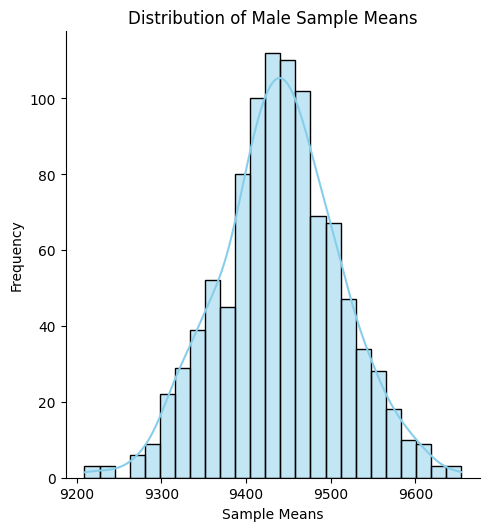

In [39]:
sns.displot(male_sample_of_means, kde=True, color='skyblue')

plt.title('Distribution of Male Sample Means')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

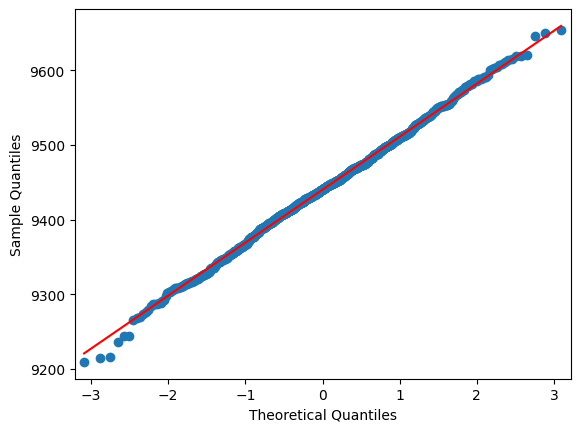

In [40]:
import statsmodels.api as sm

sm.qqplot(male_sample_of_means,line="s");

We can confirm by this qqplot that according to CLT theorem male_sample_of_means is following a gaussian distribution.

In [41]:
female_sample_of_means=np.array([walmart_df[walmart_df['Gender']=='F'].sample(5000, replace=True)['Purchase'].mean() for i in range(1000)])

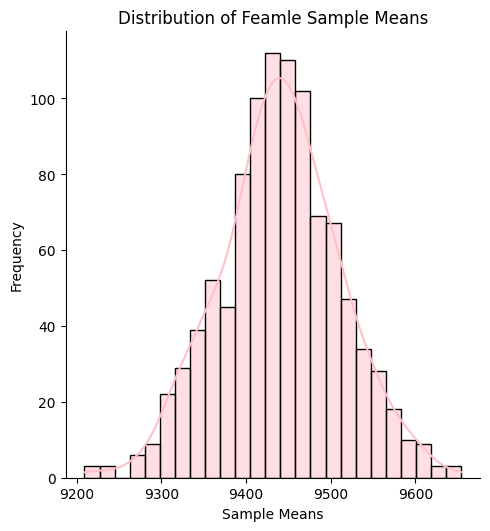

In [42]:
sns.displot(male_sample_of_means, kde=True, color='pink')

plt.title('Distribution of Feamle Sample Means')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

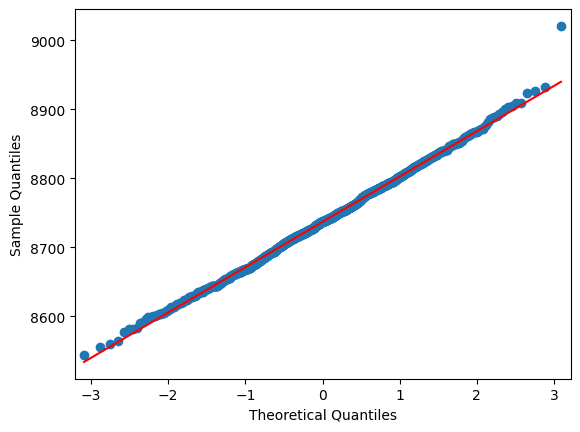

In [43]:
sm.qqplot(female_sample_of_means,line="s");

Similarly female_sample_of_means also follows a normal distribution(gaussian).


## Answer for Some Question

**Are women spending more money per transaction than men? Why or Why not?**

On average, male customers spend 9437.53, while female customers spend 8734.57 per transaction.
This indicates that women spend less per transaction compared to men, likely due to a variety of factors like product preferences, income differences, targeted promotions, or sample variations.
Confidence intervals and distribution of the mean of expenses by female and male customers:



**Do the confidence intervals of average male and female spending overlap?**

No, the confidence intervals of male and female spending do not overlap, indicating a statistically significant difference in spending patterns between genders.
Walmart can use this insight to tailor marketing strategies and product offerings to each gender segment. Targeted promotions could resonate better with female customers and potentially increase their spending.

**Results for Married vs Unmarried customers:**

Unmarried customers outspend married ones.
Walmart could focus on attracting more unmarried customers to boost sales.


**Results for Age groups:**

Customers aged 18-45 spend more compared to other age groups.
Walmart should target efforts to acquire and engage customers in this age range for better revenue.

**Gender-specific Strategies:**

Implement gender-specific marketing campaigns to cater to distinct spending behaviors.

**Enhance Unmarried Customer Engagement:**

Develop strategies to attract and retain unmarried customers, leveraging their higher spending.

**Age-Targeted Promotions:**

Design promotions and products tailored to customers aged 18-45, capitalizing on their higher spending habits.

**Customer Feedback Analysis:**

Gather feedback to understand spending variations and preferences, helping refine strategies.

**Continuous Analysis:**

Regularly monitor spending trends, adjusting strategies to evolving customer behaviors.





## Final Observation

In terms of gender distribution, the user base is predominantly male, constituting about 75% of the total, while the remaining 25% are female.

Regarding marital status, the majority of users are single, accounting for approximately 60% of the population, while the remaining 40% are married.

Approximately 80% of the user base falls within the age range of 18 to 50 years, which is further distributed as follows: around 40% of the users are aged between 26 and 35, 18% fall in the age group of 18 to 25, and another 20% are between 36 and 45 years old.

When it comes to the duration of stay in the city, a significant proportion of users have been residing for around 1 year (35%), followed by approximately 18% who have been in the city for 2 years, and another 17% who have been living in the city for 3 years.

The available products are categorized into a total of 20 distinct categories, providing a diverse range of options for users.

The user base encompasses a variety of occupations, with a total of 20 different occupation types found within the city.

## Recommendation


Enhancing Customer Engagement: The company should implement personalized marketing strategies that cater to the unique preferences and needs of each age group within the 18-45 range. This approach will not only resonate more effectively with customers but also encourage higher spending.

Targeted Promotions for Unexplored Categories: While categories 1, 5, 8 are popular among customers, the company should also consider devising targeted promotional campaigns to spotlight products from less frequented categories. By showcasing the value and benefits of these products, the company can tap into new revenue streams and diversify its product portfolio.

City-Specific Marketing Campaigns: Given the disparity in spending habits across different city categories, the company should tailor its marketing efforts to resonate with the specific preferences and lifestyle of customers in each city category. This approach will help optimize marketing ROI and drive higher engagement.

Expanding Product Range for Males: Since male customers tend to spend more, the company should actively expand and diversify its product offerings targeted specifically at this demographic. This could involve collaborating with popular brands or introducing exclusive products that cater to male preferences.

Creating Exclusive Membership Programs: To encourage customer loyalty and higher spending, the company can introduce exclusive membership programs that offer benefits like discounts, early access to sales, and personalized recommendations. This approach can incentivize both new and existing customers to increase their spending.

Omnichannel Experience: To capture a wider customer base and provide a seamless shopping experience, the company should invest in an omnichannel approach. This entails integrating online and offline platforms, allowing customers to browse, purchase, and interact with the brand across various touchpoints. Such integration can enhance customer engagement and boost spending across different channels